In [21]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


In [22]:
# loading data
ds = pd.read_csv(r'C:\Users\Jaya Krishna Sai\Desktop\Python\segcluster\Regression\USA_Housing.csv')

In [23]:
ds.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [24]:
# dropping address column as it is not required
ds.drop('Address', axis=1, inplace=True)

In [25]:
# scaling the data using MinMaxScaler
scaler = MinMaxScaler()
ds = pd.DataFrame(scaler.fit_transform(ds), columns=ds.columns)

In [26]:
ds.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,0.686822,0.441986,0.501502,0.464444,0.329942,0.425210
1,0.683521,0.488538,0.464501,0.242222,0.575968,0.607369
2,0.483737,0.468609,0.701350,0.695556,0.528582,0.425192
3,0.506630,0.660956,0.312430,0.280000,0.491549,0.507384
4,0.469223,0.348556,0.611851,0.495556,0.376988,0.250702


In [27]:
# chesking the outliers and removing them
iso = IsolationForest(contamination=0.1)
outliers = iso.fit_predict(ds)
ds['outliers'] = outliers

clean_data = ds[ds['outliers'] == 1]

In [28]:
clean_data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,outliers
0,0.686822,0.441986,0.501502,0.464444,0.329942,0.425210,1
1,0.683521,0.488538,0.464501,0.242222,0.575968,0.607369,1
2,0.483737,0.468609,0.701350,0.695556,0.528582,0.425192,1
3,0.506630,0.660956,0.312430,0.280000,0.491549,0.507384,1
4,0.469223,0.348556,0.611851,0.495556,0.376988,0.250702,1


In [29]:
# assigning X and y
X = clean_data.drop('Price', axis=1)
y = clean_data['Price']

In [30]:
X.shape, y.shape

((4500, 6), (4500,))

In [31]:
# splitting the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3600, 6), (900, 6), (3600,), (900,))

In [33]:
# performing linear regression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [34]:
y_pred = lr.predict(X_test)

In [35]:
y_pred

array([0.4788911 , 0.54825056, 0.7281561 , 0.40718908, 0.58253719,
       0.72259287, 0.64821281, 0.51716745, 0.44745163, 0.39030352,
       0.46595093, 0.35065759, 0.62545929, 0.35705795, 0.42897531,
       0.32536781, 0.54907368, 0.5119709 , 0.73539252, 0.67301856,
       0.56839834, 0.49183474, 0.35702341, 0.42709669, 0.53867399,
       0.70751803, 0.45440551, 0.56118045, 0.38438196, 0.49890889,
       0.35976411, 0.33647669, 0.54631828, 0.52271629, 0.43415361,
       0.6410209 , 0.4857295 , 0.41910856, 0.42089275, 0.41735736,
       0.31915026, 0.30085701, 0.34543247, 0.37445614, 0.63046999,
       0.41435373, 0.50737692, 0.66851922, 0.55807105, 0.47050343,
       0.43294456, 0.47016529, 0.37289589, 0.58086874, 0.66399291,
       0.69084838, 0.5882571 , 0.48701724, 0.47250244, 0.4951648 ,
       0.48146883, 0.60211048, 0.6197892 , 0.37707063, 0.59263956,
       0.49456524, 0.434167  , 0.5231071 , 0.49699586, 0.47682081,
       0.66015785, 0.45041643, 0.34207738, 0.64505368, 0.54796

In [36]:
# printing the results
print('Coefficient:',lr.coef_)
print('Intercept:',lr.intercept_)
print('Mean Squared Error:',mean_squared_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))


Coefficient: [0.78085851 0.45915951 0.36734174 0.00283854 0.41804473 0.        ]
Intercept: -0.5689831823748749
Mean Squared Error: 0.0016067183291024805
R2 Score: 0.898943204708291
Mean Absolute Error: 0.03217762044548484


In [37]:
#sns.scatterplot(x=y_test,y=y_pred)
#plt.plot(y_test)

In [38]:
y_pred1 = lr.predict(X_train)

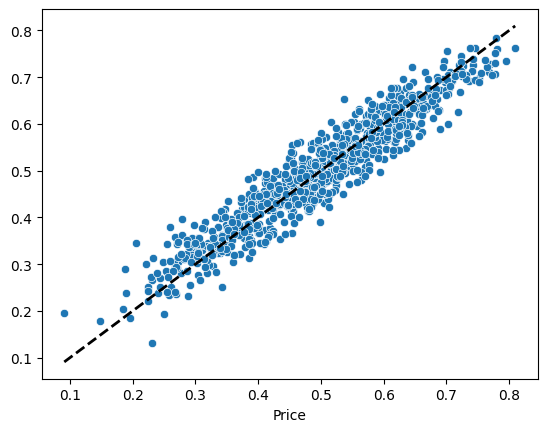

In [39]:
# plotting the results
sns.scatterplot(x=y_test,y=y_pred)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=2)
plt.show()

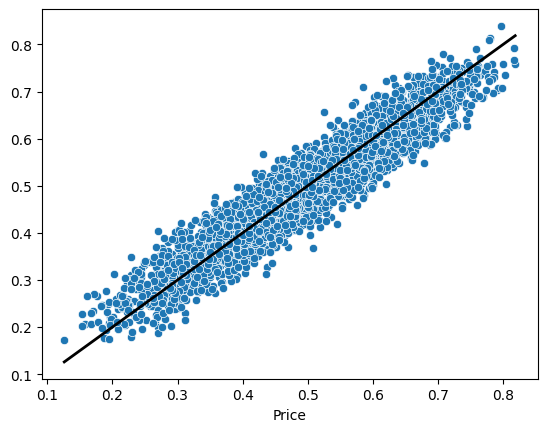

In [40]:
# plotting the results
sns.scatterplot(x=y_train,y=y_pred1)
plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],'k-',lw=2)
plt.show()